In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import * 

In [5]:
def generate_direction(num):
    if num % 2 == 0:
        return np.array([1, 0])
    else:
        return np.array([0, 1])

def objective(x, q=1):
    if q == 1:
        return 100*(x[1] - x[0]**2)**2 + (1-x[0])**2
    elif q == 2:
        return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2
    else:
        raise ValueError('Bad question number')
    
def find_best_lambda(x, lbd, q):
    sol = solve(diff(objective(x, q)), lbd)
    sol = np.array([float(re(i)) for i in sol])
    hess = diff(diff(objective(x, 1)))
    hess_vals = np.array([float(hess.evalf(subs={lbd: i})) for i in sol])
    
    if len(sol) == 1:
        return sol
   
    candidates = [i for i in range(len(sol)) if hess_vals[i] > 0]
    hess_vals = [hess_vals[i] for i in candidates]
    
    try:
        return sol[candidates[np.argmax(hess_vals)]]
    except:
        return 'None'
    
    
def unidirectional_search(x_0, q):
    
    # Parameters to start off
    x_0 = np.asarray(x_0)
    x = x_0
    
    # Determine starting direction
    x_mov, y_mov = x + np.array([0.01, 0]), x + np.array([0, 0.01])
    if objective(x_mov, q) < objective(y_mov, q):
        num = 0
    else:
        num = 1      
    u = generate_direction(num)
    
    # Other controllers
    count = 0
    feasible_count = 0
    done = False
    lbd = Symbol('lambda')
    
    # Movement of point
    points = []
    
    # Loop
    while not done:
        
        # Find next symbolic point 
        x_symb = x + lbd * u
        
        # Find best lambda and compute new vector
        step_size = find_best_lambda(x_symb, lbd, q)
        
        if isinstance(step_size, str):
            break
        else:
            x_new = x + step_size * u
        
        # Decision
        if objective(x_new, q) < objective(x, q):
            x = x_new
            feasible_count += 1
            u = generate_direction(count+num)
        elif objective(x_new, q) >= objective(x, q):
            u = generate_direction(count+num)
            
        if count % 100 == 0:
            print("Iteration {:3d} - x {} - f(x) {:.5f}".format(
                count, x, objective(x, q)
            ))
        points.append(x)

        count += 1
        if count > 2000:
            done = True
            
    return x, feasible_count, np.array(points)

In [22]:
opt, feasible_count, points = unidirectional_search([0,1.5], q=1)

Iteration   0 - x [1.22437075 1.5       ] - f(x) 0.05043
Iteration 100 - x [1.20652499 1.45570254] - f(x) 0.04265
Iteration 200 - x [1.18930511 1.41444665] - f(x) 0.03584
Iteration 300 - x [1.17309145 1.37614354] - f(x) 0.02996
Iteration 400 - x [1.15788278 1.34069253] - f(x) 0.02493
Iteration 500 - x [1.14367053 1.30798228] - f(x) 0.02064
Iteration 600 - x [1.13043897 1.27789227] - f(x) 0.01701
Iteration 700 - x [1.11816566 1.25029444] - f(x) 0.01396
Iteration 800 - x [1.10682204 1.22505503] - f(x) 0.01141
Iteration 900 - x [1.09637417 1.20203633] - f(x) 0.00929
Iteration 1000 - x [1.0867836 1.1810986] - f(x) 0.00753
Iteration 1100 - x [1.07800825 1.16210178] - f(x) 0.00609
Iteration 1200 - x [1.07000333 1.14490712] - f(x) 0.00490
Iteration 1300 - x [1.06272228 1.12937865] - f(x) 0.00393
Iteration 1400 - x [1.05611762 1.11538442] - f(x) 0.00315
Iteration 1500 - x [1.05014169 1.10279757] - f(x) 0.00251
Iteration 1600 - x [1.04474739 1.09149711] - f(x) 0.00200
Iteration 1700 - x [1.0398

In [23]:
opt

array([1.02809272, 1.05697465])

In [24]:
feasible_count

2000

In [25]:
final_points = [[0,1.5]]
for i in points.tolist():
    if i in final_points:
        continue
    else:
        final_points.append(i)
        
final_points = np.array(final_points)

In [26]:
def track_movements(q, points):
    x = np.linspace(-2, 2, 1000)
    y = np.linspace(-2, 2, 1000)
    xx, yy = np.meshgrid(x, y)
    zz = np.array([objective(a, q) for a in np.c_[xx.ravel(), yy.ravel()]])
    zz = zz.reshape(xx.shape)
    
    plt.figure(figsize=(12, 10))
    plt.pcolormesh(xx, yy, zz)
    plt.colorbar()
    plt.plot(points[:, 0], points[:, 1], color='yellow', linewidth=2)
    plt.scatter(points[:, 0], points[:, 1], c='yellow', s=40, edgecolor='yellow')
    plt.text(points[0][0]-0.3, points[0][1]-0.2, 'start', color='yellow', fontsize=12, fontweight='bold')
    plt.text(points[-1][0]+0.1, points[-1][1]+0.1, 'end', color='yellow', fontsize=12, fontweight='bold')
    plt.axvline(points[-1][0], ymin=0, ymax=1, color='white', linewidth=1)
    plt.axhline(points[-1][1], xmin=0, xmax=1, color='white', linewidth=1)
    plt.grid(alpha=0.8)
    plt.title('Univariate method with initial [0,1.5]')
    plt.show()

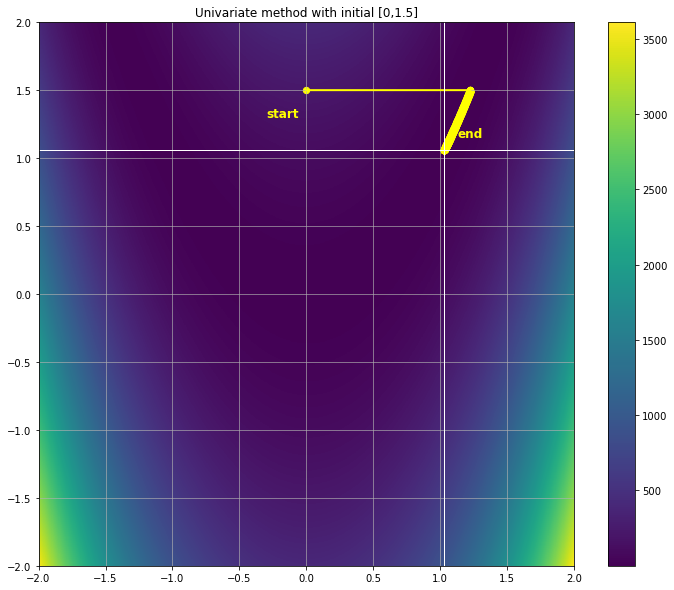

In [27]:
track_movements(1, final_points)

In [24]:
opt, feasible_count, points = unidirectional_search([0, 0], q=2)

Iteration   0 - x [0.  3.8] - f(x) 1.80000
Iteration 100 - x [1. 3.] - f(x) 0.00000
Iteration 200 - x [1. 3.] - f(x) 0.00000
Iteration 300 - x [1. 3.] - f(x) 0.00000
Iteration 400 - x [1. 3.] - f(x) 0.00000
Iteration 500 - x [1. 3.] - f(x) 0.00000
Iteration 600 - x [1. 3.] - f(x) 0.00000
Iteration 700 - x [1. 3.] - f(x) 0.00000
Iteration 800 - x [1. 3.] - f(x) 0.00000
Iteration 900 - x [1. 3.] - f(x) 0.00000
Iteration 1000 - x [1. 3.] - f(x) 0.00000
Iteration 1100 - x [1. 3.] - f(x) 0.00000
Iteration 1200 - x [1. 3.] - f(x) 0.00000
Iteration 1300 - x [1. 3.] - f(x) 0.00000
Iteration 1400 - x [1. 3.] - f(x) 0.00000
Iteration 1500 - x [1. 3.] - f(x) 0.00000
Iteration 1600 - x [1. 3.] - f(x) 0.00000
Iteration 1700 - x [1. 3.] - f(x) 0.00000
Iteration 1800 - x [1. 3.] - f(x) 0.00000
Iteration 1900 - x [1. 3.] - f(x) 0.00000
Iteration 2000 - x [1. 3.] - f(x) 0.00000


In [28]:
feasible_count

151

In [29]:
opt

array([1., 3.])

In [30]:
final_points = [[0, 0]]
for i in points.tolist():
    if i in final_points:
        continue
    else:
        final_points.append(i)
        
final_points = np.array(final_points)

In [31]:
def track_movements(q, points):
    x = np.linspace(-5, 5, 1000)
    y = np.linspace(-5, 5, 1000)
    xx, yy = np.meshgrid(x, y)
    zz = np.array([objective(a, q) for a in np.c_[xx.ravel(), yy.ravel()]])
    zz = zz.reshape(xx.shape)
    
    plt.figure(figsize=(12, 10))
    plt.pcolormesh(xx, yy, zz)
    plt.colorbar()
    plt.plot(points[:, 0], points[:, 1], color='yellow', linewidth=2)
    plt.scatter(points[:, 0], points[:, 1], c='yellow', s=40, edgecolor='yellow')
    plt.text(points[0][0]-0.3, points[0][1]-0.2, 'start', color='yellow', fontsize=12, fontweight='bold')
    plt.text(points[-1][0]+0.1, points[-1][1]+0.1, 'end', color='yellow', fontsize=12, fontweight='bold')
    plt.axvline(points[-1][0], ymin=0, ymax=1, color='white', linewidth=1)
    plt.axhline(points[-1][1], xmin=0, xmax=1, color='white', linewidth=1)
    plt.grid(alpha=0.8)
    plt.title('Univariate method with initial [0,0] Q2')
    plt.show()

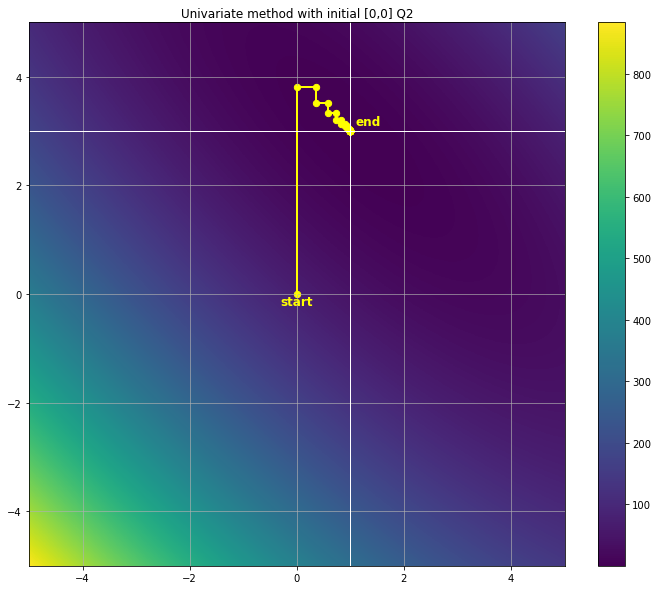

In [32]:
track_movements(2, final_points)